# NBA Data Exploration

## Preliminary Wrangling

This document explores a dataset containing NBA team performance by year, meaning all the NBA team franchises and their cumulitive statistics by year.

In [1]:
# import all packages and set plots as inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('nba_teams.csv')

In [3]:
# high-level overview of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             906 non-null    int64  
 1   TEAM_NAME              906 non-null    object 
 2   YEAR                   906 non-null    int64  
 3   WIN_PCT                906 non-null    float64
 4   NBA_FINALS_APPEARANCE  60 non-null     object 
 5   FG_PCT                 906 non-null    float64
 6   FG3_PCT                906 non-null    float64
 7   FT_PCT                 906 non-null    float64
 8   OREB                   906 non-null    float64
 9   DREB                   906 non-null    float64
 10  REB                    906 non-null    float64
 11  AST                    906 non-null    float64
 12  PF                     906 non-null    float64
 13  STL                    906 non-null    float64
 14  TOV                    906 non-null    float64
 15  BLK   

In [10]:
df.describe()

,YEAR,GP,WIN_PCT,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,2005.274834,79.735099,0.499829,0.455702,0.351315,0.754591,11.702044,30.816453,42.518498,22.417729,21.474869,7.834460,14.834193,4.978283,100.555599
std,8.881203,6.644104,0.155242,0.017713,0.024123,0.030242,1.745308,2.370231,2.137676,2.262968,1.910877,0.989616,1.298754,0.872307,6.645036
min,1990.000000,50.000000,0.106000,0.401000,0.194000,0.660000,7.646341,24.926829,35.634146,15.640000,16.585366,5.536585,11.097222,2.378049,81.900000
25%,1998.000000,82.000000,0.379250,0.444000,0.339000,0.736000,10.468218,29.170732,41.048780,20.829268,20.121951,7.134146,13.952051,4.353659,95.817073
50%,2005.000000,82.000000,0.512000,0.455000,0.353000,0.756000,11.585366,30.486327,42.396341,22.164634,21.353659,7.766091,14.780244,4.902439,99.713415
75%,2013.000000,82.000000,0.611000,0.467000,0.367000,0.775000,12.743533,32.307927,43.939024,23.862805,22.740854,8.418659,15.719512,5.487066,104.518293
max,2020.000000,82.000000,0.890000,0.512000,0.428000,0.839000,18.536585,42.232877,51.698630,30.378049,28.073171,12.841463,18.987805,8.365854,120.125000


In [4]:
objects = df.select_dtypes(include='object')
for col in objects.columns :
    print(col)
    print( objects[col].unique())

TEAM_NAME
['Hawks' 'Celtics' 'Cavaliers' 'Pelicans' 'Bulls' 'Mavericks' 'Nuggets'
 'Warriors' 'Rockets' 'Clippers' 'Lakers' 'Heat' 'Bucks' 'Timberwolves'
 'Nets' 'Knicks' 'Magic' 'Pacers' '76ers' 'Suns' 'Trail Blazers' 'Kings'
 'Spurs' 'Thunder' 'Raptors' 'Jazz' 'Grizzlies' 'Wizards' 'Pistons'
 'Hornets']
NBA_FINALS_APPEARANCE
[nan 'LEAGUE CHAMPION' 'FINALS APPEARANCE']


### What is the structure of your dataset?

There are 906 obsevations in the dataset with 17 features. Most variables are numeric in nature, but the variables there are 2 qualitative variables (TEAM_NAME and NBA_FINALS_APPEARANCE).

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in what factors contribute to win percentage and also potentially championship. So my most important features are win_pct and NBA_FINALS_APPEARANCE. I will also see how the other 13 features are correlated to these other features. I will also see how NBA_FINALS_APPEARANCE is correlated with win percentage. I am also concerned with which teams have better win percentages, NBA rings and conference titles.

## Univariate Exploration

In [5]:
df['NBA_FINALS_APPEARANCE'].value_counts()
#as we can see they marked LEAGUE_CHAMPION for NBA champion and FINALS APPEARANCE for the runners-up
#as a result I engineered 2 different features

FINALS APPEARANCE    30
LEAGUE CHAMPION      30
Name: NBA_FINALS_APPEARANCE, dtype: int64

In [6]:
#created 2 columns 
#"Champions" to represent the winners
#"Conference Champions" to represent 2 people who won their conference 
df['Champions'] = df['NBA_FINALS_APPEARANCE'] == 'LEAGUE CHAMPION'
df['Conference Champions'] = df['NBA_FINALS_APPEARANCE'].isna() == False

In [7]:
#exploring all the non-numeric columns 
nonnumeric = df.select_dtypes(exclude=[float, int])
for col in nonnumeric.columns :
    print( nonnumeric[col].value_counts() )

Heat             31
Bucks            31
Kings            31
Jazz             31
Bulls            31
Rockets          31
Hawks            31
Nuggets          31
Lakers           31
Celtics          31
Pistons          31
Knicks           31
Wizards          31
Clippers         31
76ers            31
Trail Blazers    31
Pelicans         31
Magic            31
Warriors         31
Cavaliers        31
Spurs            31
Mavericks        31
Suns             31
Pacers           31
Thunder          31
Timberwolves     31
Nets             31
Grizzlies        26
Raptors          26
Hornets          17
Name: TEAM_NAME, dtype: int64
FINALS APPEARANCE    30
LEAGUE CHAMPION      30
Name: NBA_FINALS_APPEARANCE, dtype: int64
False    876
True      30
Name: Champions, dtype: int64
False    846
True      60
Name: Conference Champions, dtype: int64


**What is the general distribution of each statistic?**

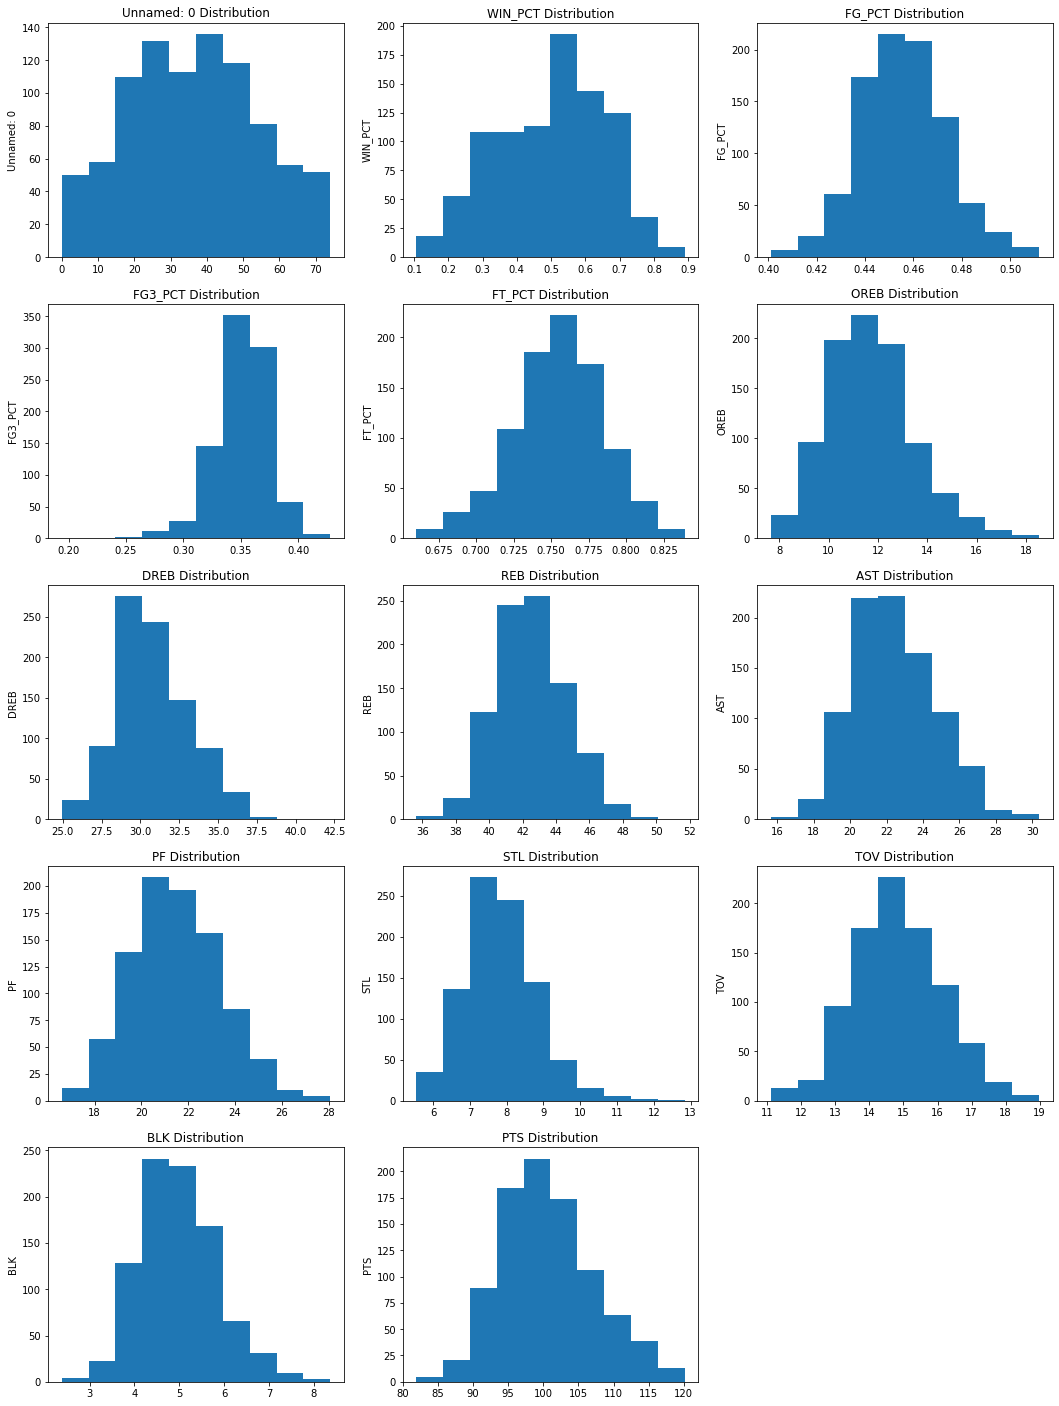

In [9]:
#explored all the different numeric variables and their distributions
cols = list( df.select_dtypes(include=[float, int]).columns )
cols.remove('YEAR')
fig = plt.figure(figsize=(18, 25))

for i, col in enumerate(cols) :
    ax = plt.subplot(5, 3, i+1);
    ax.hist(data=df, x=col);
    ax.set_ylabel(col)
    ax.set_title(col + ' Distribution')

## Bivariate Exploration

**How are the win percentages of the champions and conference winners compared to the general teams? Are there any outliers (underdogs in any of these winners)?**

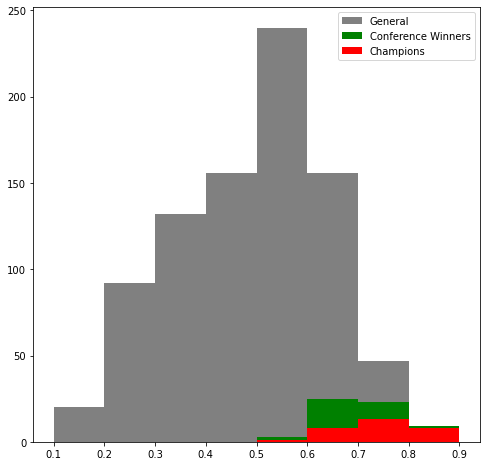

In [10]:
#Wanted to see where the conference winners and champions lie when it comes to win percentage
#see if there were any outliers
champions = df.query("NBA_FINALS_APPEARANCE == 'LEAGUE CHAMPION'" )
conf_winner = df.query("NBA_FINALS_APPEARANCE in ['LEAGUE CHAMPION', 'FINALS APPEARANCE']")
others = df.query("NBA_FINALS_APPEARANCE not in ['LEAGUE CHAMPION', 'FINALS APPEARANCE']")

bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(8, 8));
plt.hist(others['WIN_PCT'], bins = bins, label="General", color='Gray')
plt.hist(conf_winner['WIN_PCT'], bins = bins, label="Conference Winners", color='Green')
plt.hist(champions['WIN_PCT'], bins = bins, label="Champions", color='Red')
plt.legend();
#as we can see there are some teams in the 0.6-0.7 bin
#even some in the 0.5-0.6 bin

In [11]:
#Here we can look all the 60 finals appearaces with filters
finals_df = df[['YEAR', 'TEAM_NAME', 'NBA_FINALS_APPEARANCE', 'WIN_PCT']].dropna().sort_values(['YEAR', 'NBA_FINALS_APPEARANCE'])
finals_df.query("WIN_PCT < 0.65")

,YEAR,TEAM_NAME,NBA_FINALS_APPEARANCE,WIN_PCT
240,1994,Rockets,LEAGUE CHAMPION,0.573
461,1998,Knicks,FINALS APPEARANCE,0.540
433,2001,Nets,FINALS APPEARANCE,0.634
434,2002,Nets,FINALS APPEARANCE,0.598
344,2005,Heat,LEAGUE CHAMPION,0.634
78,2006,Cavaliers,FINALS APPEARANCE,0.610
50,2009,Celtics,FINALS APPEARANCE,0.610
86,2014,Cavaliers,FINALS APPEARANCE,0.646
88,2016,Cavaliers,FINALS APPEARANCE,0.622
89,2017,Cavaliers,FINALS APPEARANCE,0.610


**Which statistics are most correlated with winning percentage?**

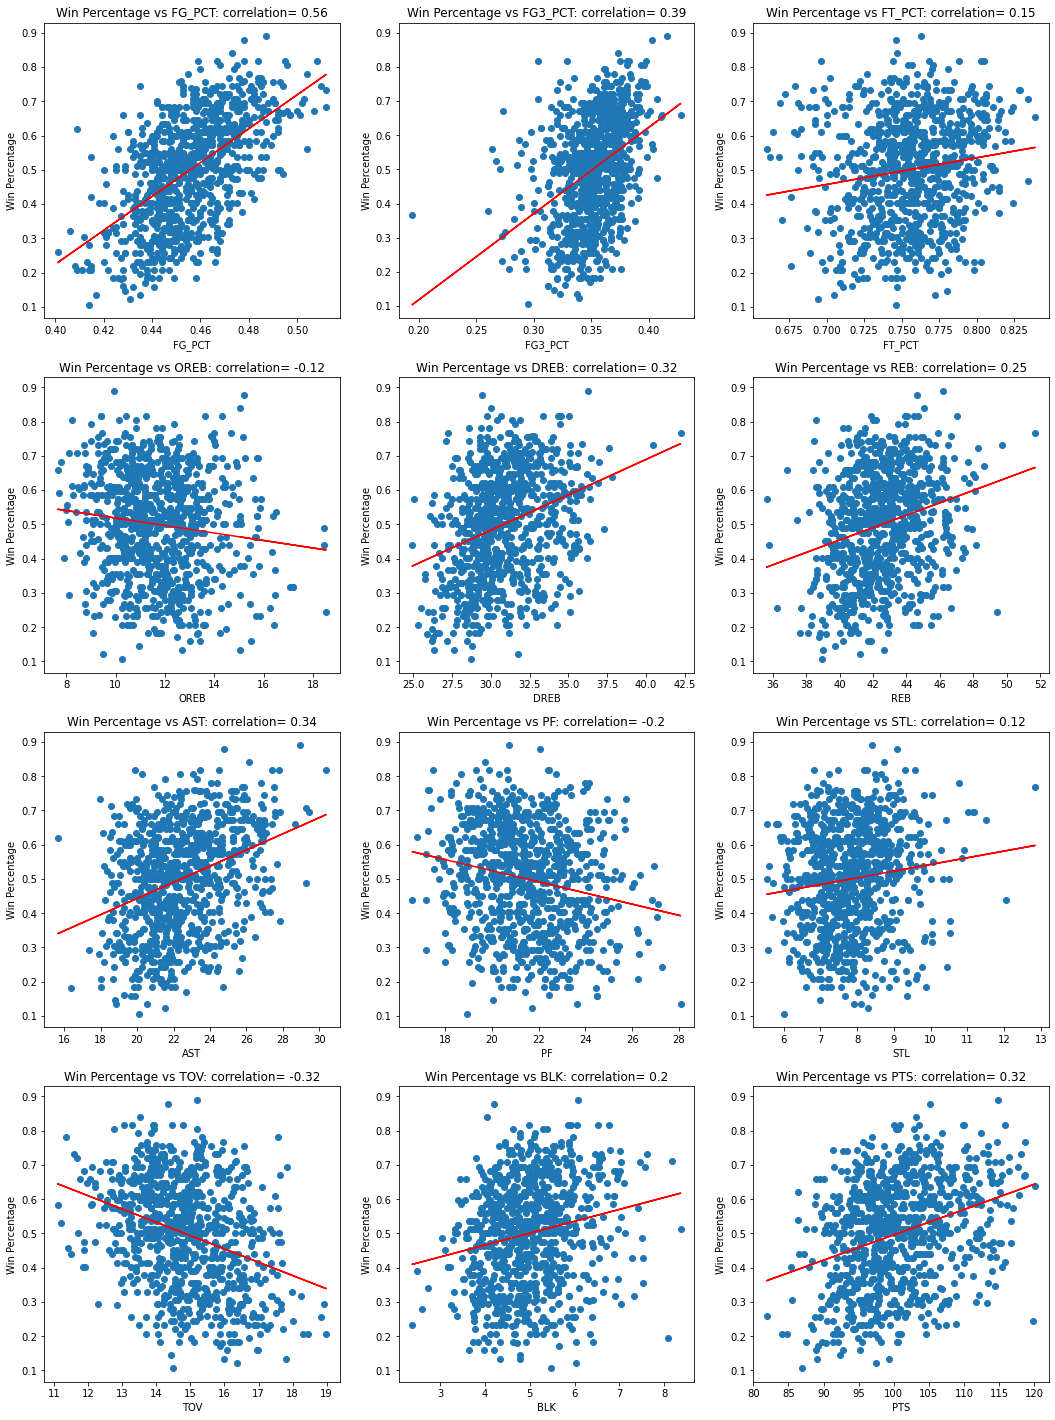

In [12]:
#I wanted to see how each numeric column correlates with win percentage
#I plotted a scatterplot and trend line
from numpy.polynomial.polynomial import polyfit
from scipy.stats import pearsonr
cols_to_eval = df.drop(columns=['WIN_PCT']).select_dtypes(float).columns

fig = plt.figure(figsize=(18, 25))
for i, col in enumerate(cols_to_eval) :
    ax = plt.subplot(4, 3, i+1);
    ax.scatter(data=df, x=col, y="WIN_PCT")
    b, m = polyfit(df[col], df['WIN_PCT'], 1)
    x = df[col]
    ax.plot(x, b + m * x, '-', color='Red')
    ax.set_ylabel('Win Percentage')
    ax.set_xlabel(col)
    correlation_ = str( np.round(pearsonr(x, df['WIN_PCT'])[0], 2) )
    ax.set_title("Win Percentage vs " + col + ': correlation= ' + correlation_)

**Which teams have the most championships and conference titles in the last 30 years?**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


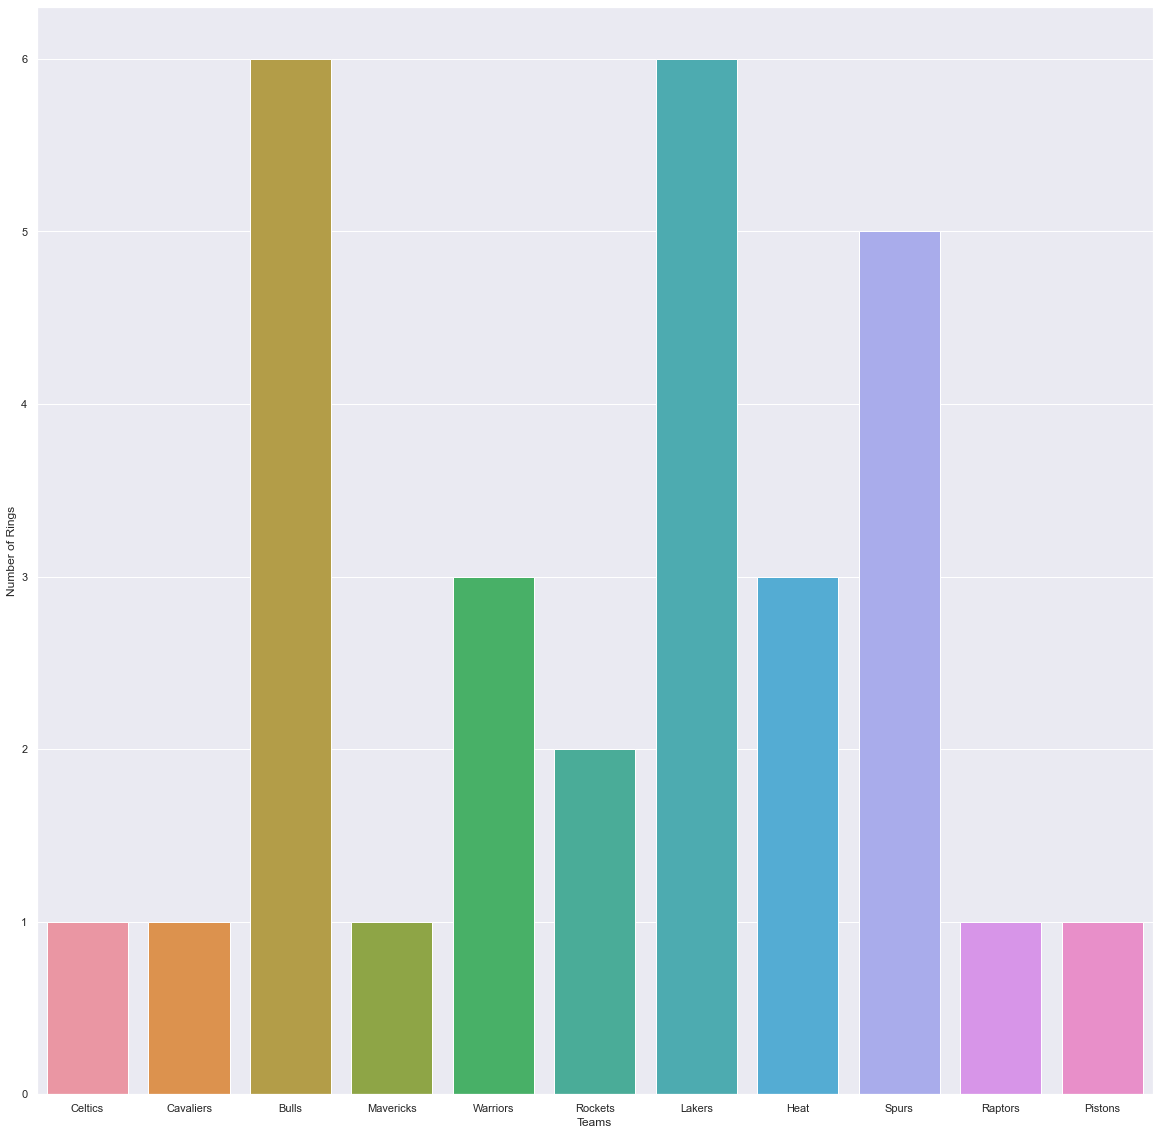

In [16]:
#I compared nba finals appearance/nba championship by team
sb.countplot(champions['TEAM_NAME']);
plt.xlabel('Teams');
plt.ylabel('Number of Rings');
#plt.xticks(rotation=90);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


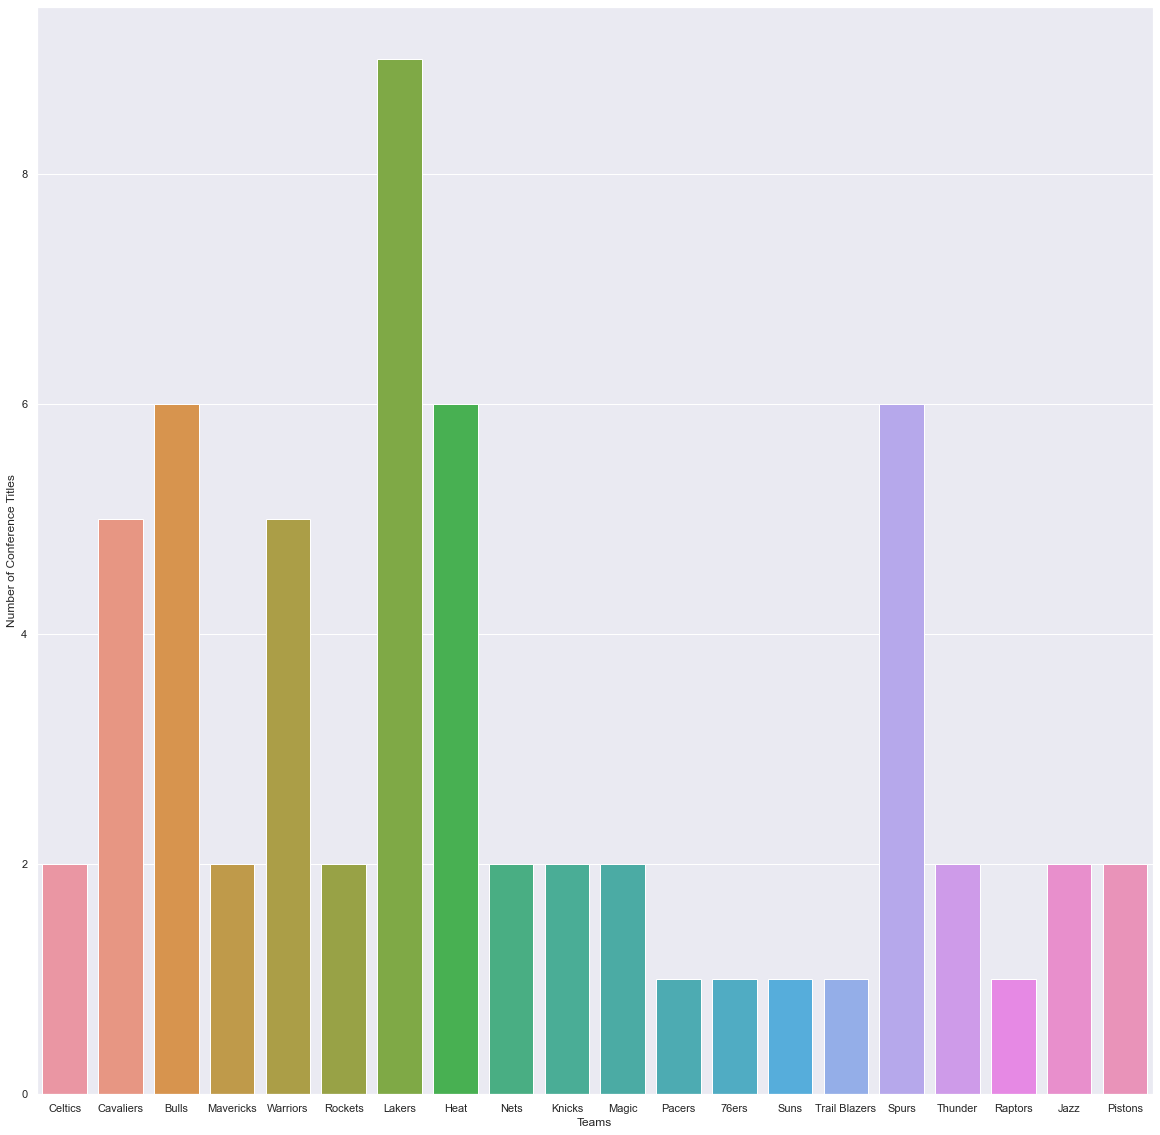

In [17]:
sb.countplot( conf_winner['TEAM_NAME']);
plt.xlabel('Teams');
plt.ylabel('Number of Conference Titles');

**Which statistics are the most correlated with championship teams? Are there any special statistics that are imaportant with championship teams?**

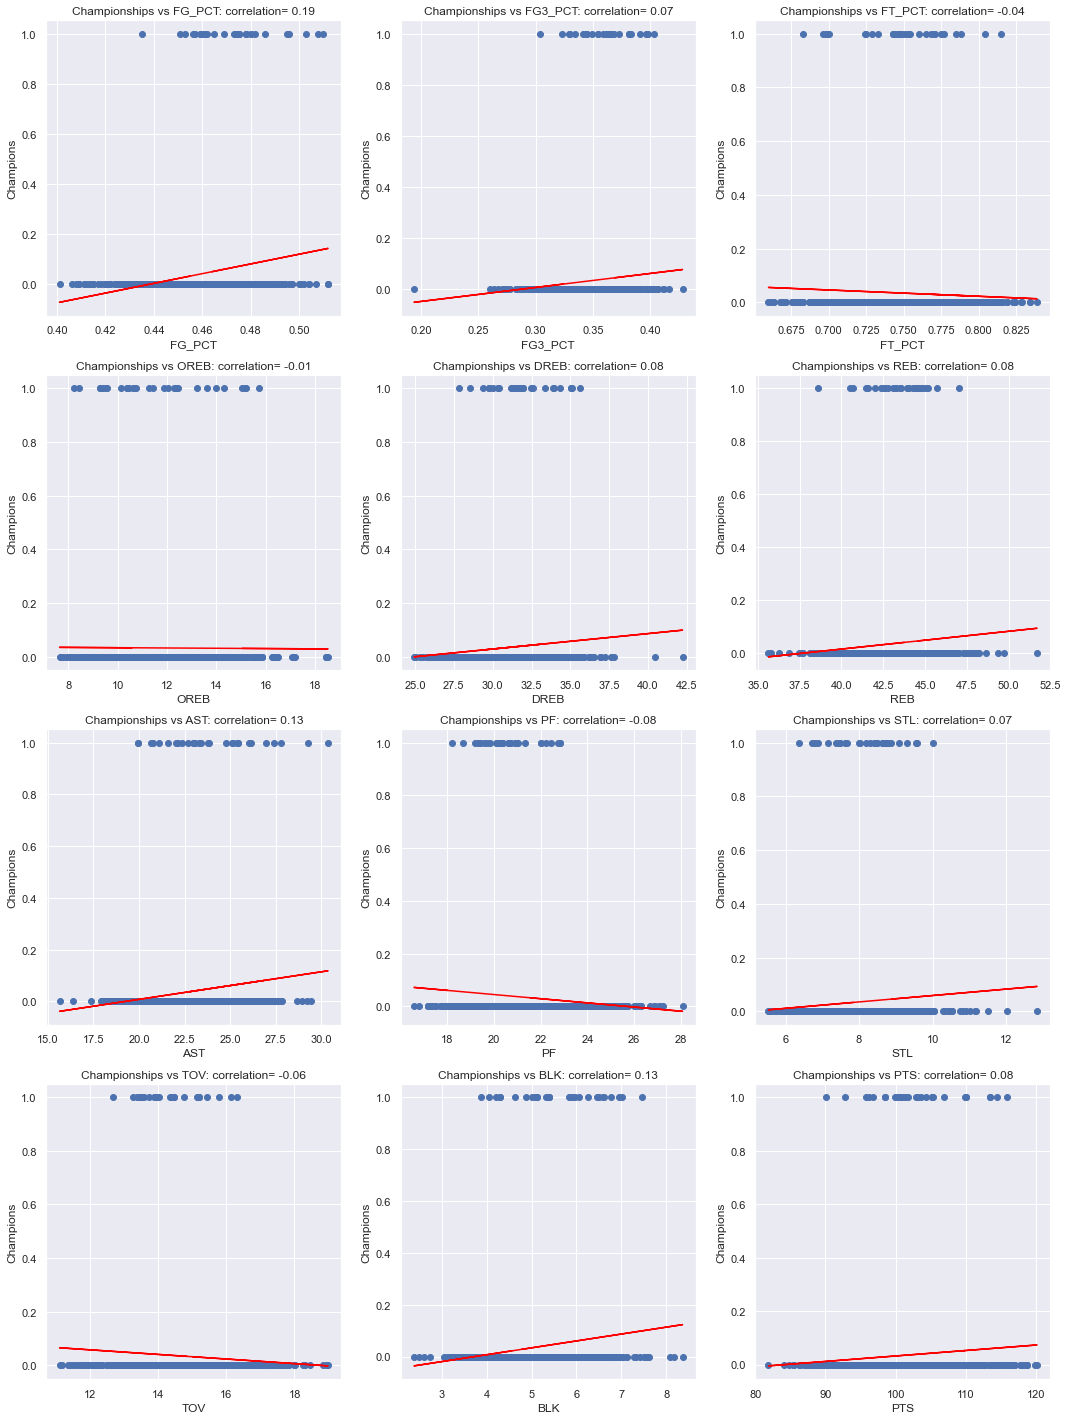

In [18]:
#Now I wanted to see if there were any statistics that were heavily correlated with championship
#all of these stats have weak correlation because there are only 30 sample points
fig = plt.figure(figsize=(18, 25))
for i, col in enumerate(cols_to_eval) :
    ax = plt.subplot(4, 3, i+1);
    ax.scatter(data=df, x=col, y="Champions")
    b, m = polyfit(df[col], df['Champions'], 1)
    x = df[col]
    ax.plot(x, b + m * x, '-', color='Red')
    ax.set_ylabel('Champions')
    ax.set_xlabel(col)
    correlation_ = str( np.round(pearsonr(x, df['Champions'])[0], 2) )
    ax.set_title("Championships vs " + col + ': correlation= ' + correlation_)

## Multivariate Exploration

**How have all 30 teams performed across the last 3 decades?**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


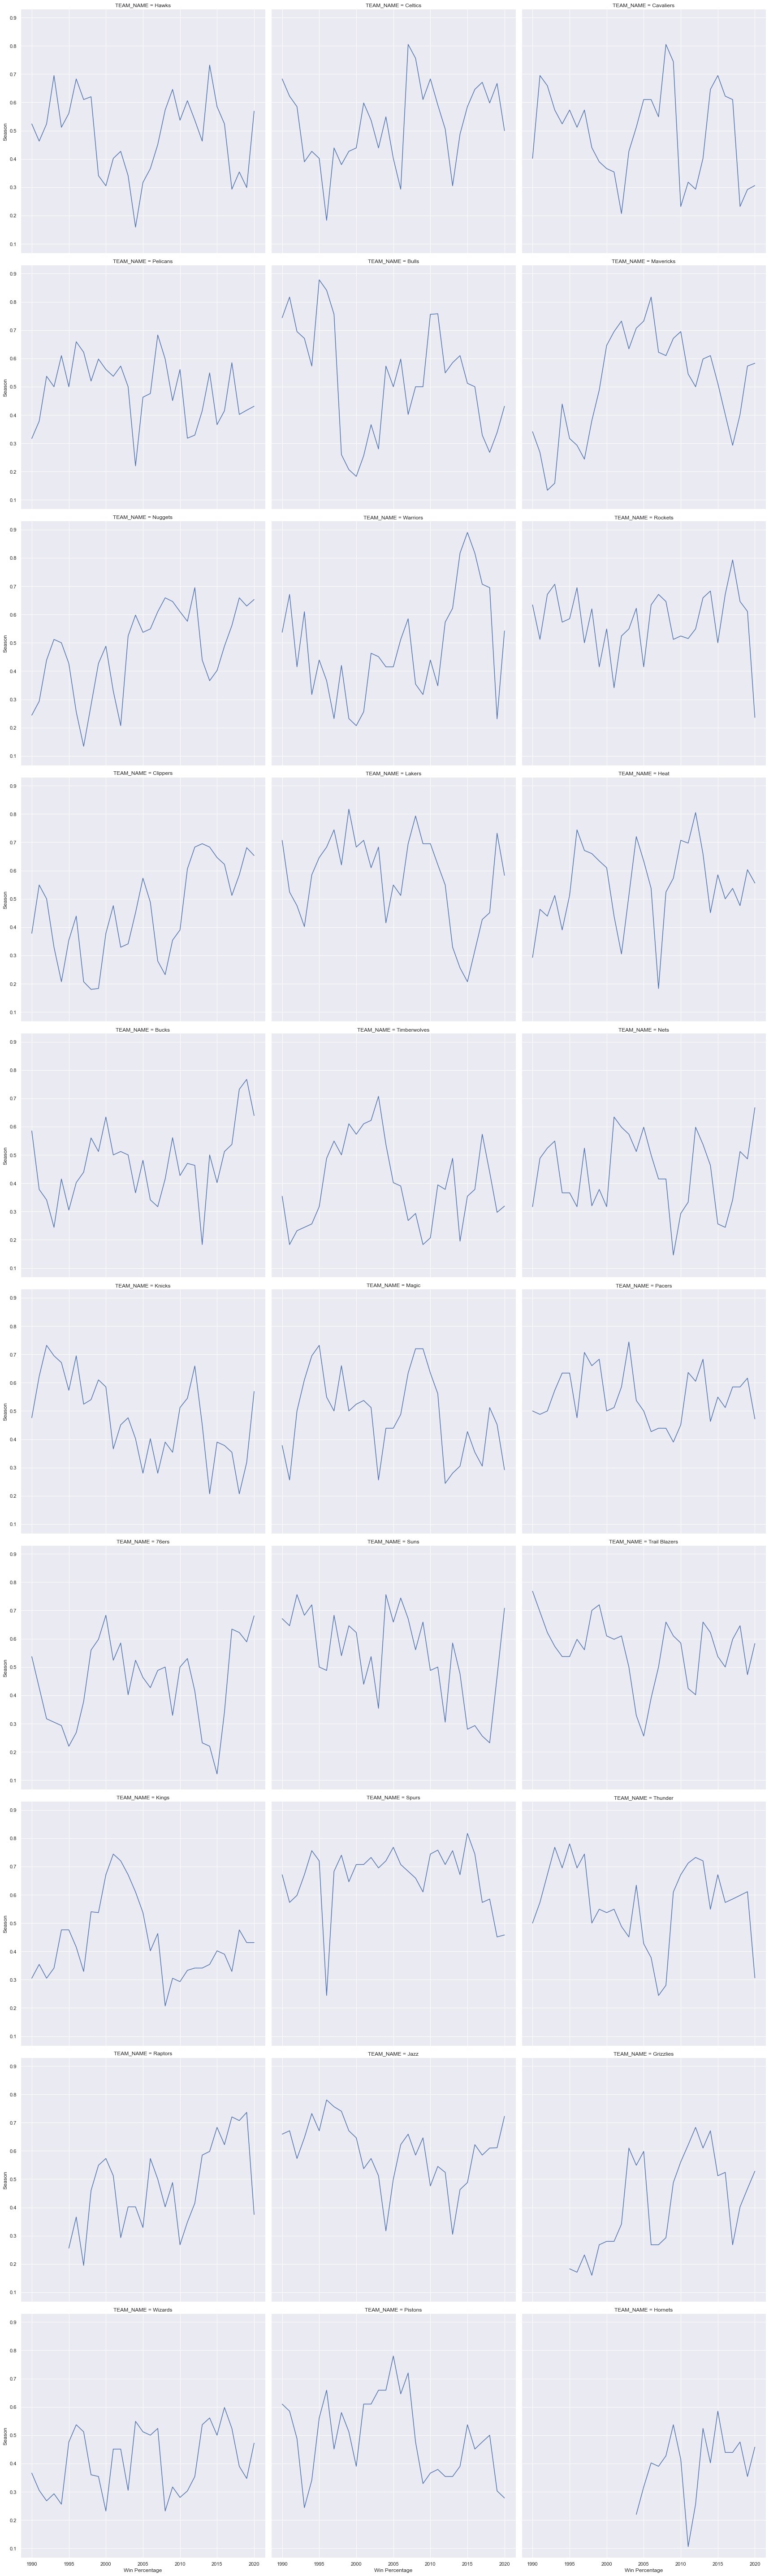

In [19]:
#Saw the trend of each team's win percetage by year
g = sb.FacetGrid(data = df, col = 'TEAM_NAME', col_wrap = 3, size = 8)
g.map(sb.lineplot, 'YEAR', 'WIN_PCT')
g.set_xlabels('Win Percentage')
g.set_ylabels('Season')

**Which teams were dominant (league champions) in which decade?**

In [20]:
#engineered a new object-column that I used later on for analysis
def decade_trans(year) :
    """
    INPUT:
        year (int)
    OUTPUT:
        string
    -this function returns a string dependig on if the year is between 1990-1999, 2000-2009, or 2010+
    """
    if (year < 2000) :
        return '90s'
    elif (year < 2010) :
        return 'early 2000s'
    return '2010+'

df['DECADE'] = df['YEAR'].apply(decade_trans)

0        90s
1        90s
2        90s
3        90s
4        90s
       ...  
901    2010+
902    2010+
903    2010+
904    2010+
905    2010+
Name: DECADE, Length: 906, dtype: object

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


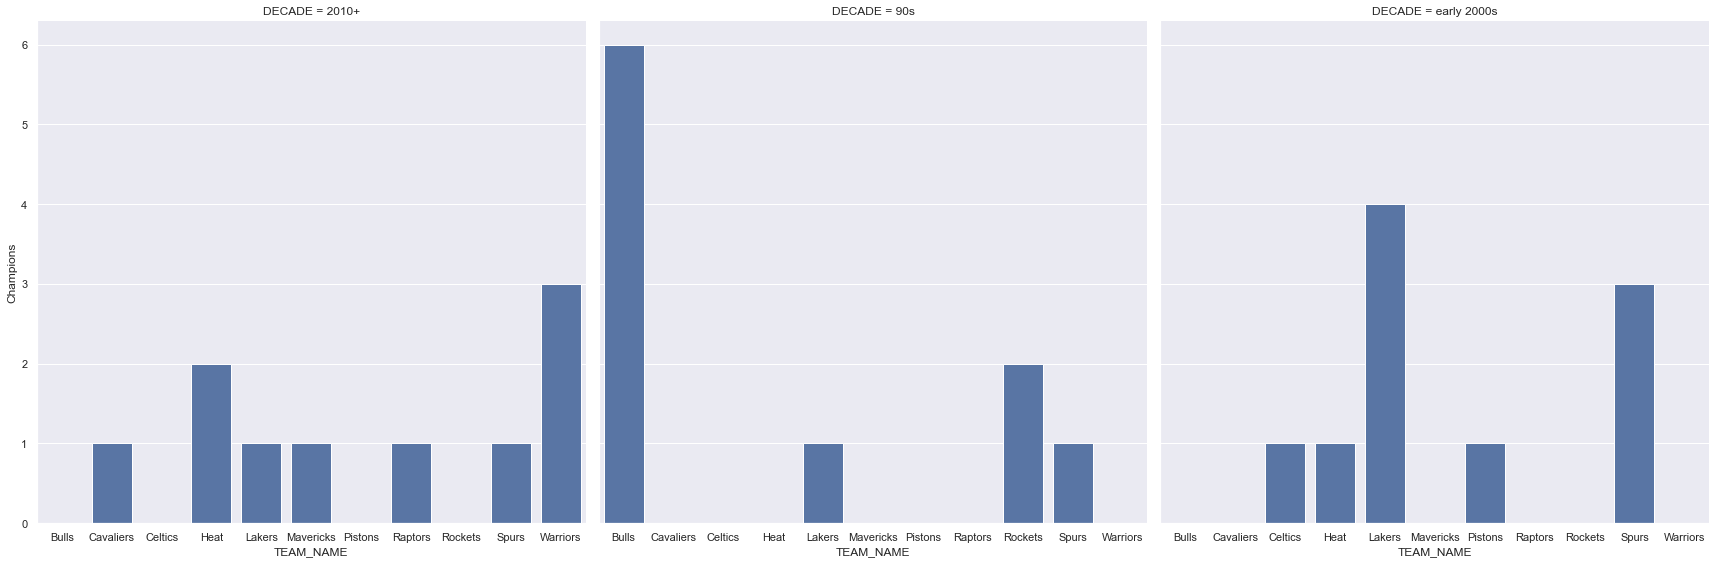

In [21]:
#Wanted to see which teams were dominant by titles
#As we can see Bulls dominated with Jordan with 6 titles in the 90's
#Spurs and lakers dominated in the 2000's with 3 and 4 titles
#2010 seemed to have the most turnover with Warriors winning 3 but the other 7 split by 6 different teams
titles_by_decade = df[['TEAM_NAME', 'DECADE', 'Champions']].groupby(by=['DECADE', 'TEAM_NAME'], as_index=False).sum()
champ_teams = set(titles_by_decade.query("Champions != 0").TEAM_NAME)
titles_by_decade = titles_by_decade.query("TEAM_NAME in @champ_teams")

g = sb.FacetGrid(data = titles_by_decade, col = 'DECADE', col_wrap = 3, size=8);
g.map(sb.barplot, 'TEAM_NAME', 'Champions');

In [22]:
best_decade = df[['TEAM_NAME', 'DECADE', 'WIN_PCT']].groupby(by=['DECADE', 'TEAM_NAME'], as_index=False).mean(
    ).groupby(by='DECADE', as_index=False).apply(lambda x : x.sort_values(by = 'WIN_PCT', ascending = False).head(5).reset_index(drop = True))

**Championship is one metric, but which teams were the most consistently dominant as far as win percentage by decade?**

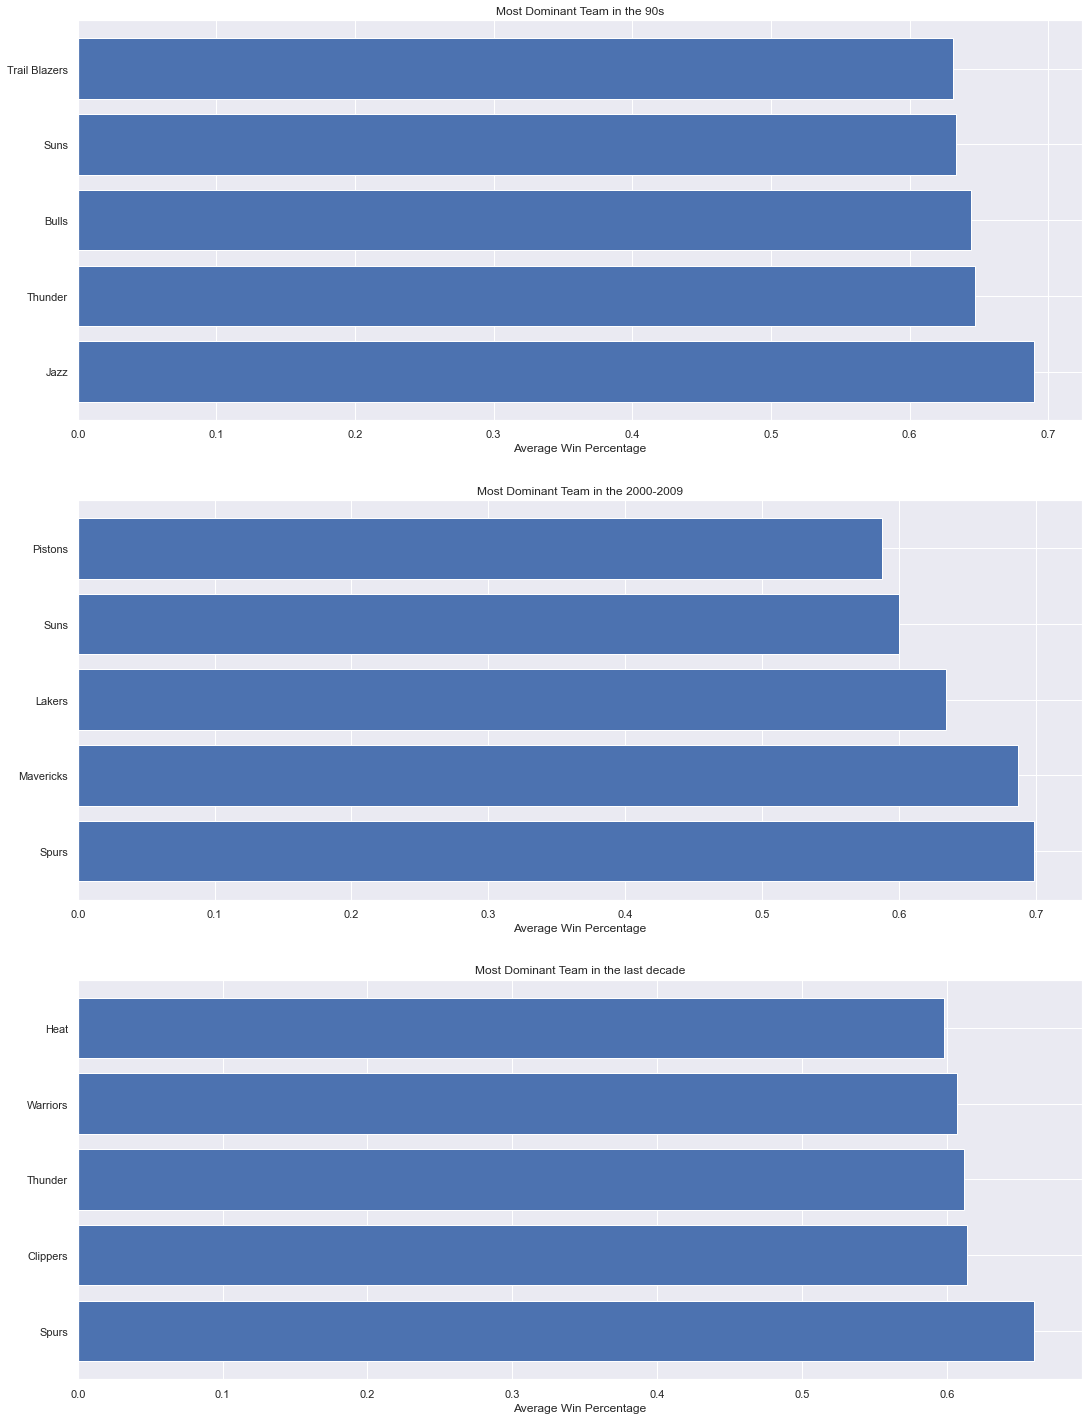

In [23]:
def repeat_() :
    """
    NO input or output
    -this just repeats the code to generate a bar to avoid rewriting code 
    -df1 is constantly changing
    """
    ax.barh(df1['TEAM_NAME'], df1['WIN_PCT'])
    ax.set_xlabel('Average Win Percentage')


    

fig = plt.figure(figsize=(18, 25))
ax = plt.subplot(3, 1, 1)
df1 = best_decade.query("DECADE == '90s'")
ax.set_title('Most Dominant Team in the 90s')
repeat_()

ax = plt.subplot(3, 1, 2)
df1 = best_decade.query("DECADE == 'early 2000s'")
ax.set_title('Most Dominant Team in the 2000-2009')
repeat_()

ax = plt.subplot(3, 1, 3)
df1 = best_decade.query("DECADE == '2010+'")
ax.set_title('Most Dominant Team in the last decade')
repeat_()